### Importowanie bibliotek

In [49]:
import pygad
import time
import pandas as pd

### Dane dla algorytmu genetycznego

In [50]:
gene_space = [-2, -1, 1, 2]
num_genes = 30
sol_per_pop = 1000
num_generations = 3000
crossover_type = None
mutation_type = "random"
mutation_percent_genes = 5
stop_criteria=["reach_2000000"]

### Labirynt reprezentowany jako macierz

In [51]:
labirynt = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

### Funkcja fitness

In [52]:
def fitness_func(solution, solution_idx):
    fitness = 0
    route = 0
    x = 1
    y = 1
    for gene in solution:
        new_x = x
        new_y = y
        if gene == -1:
            new_x -= 1
        elif gene == 1:
            new_x += 1
        elif gene == -2:
            new_y += 1
        elif gene == 2:
            new_y -= 1
        point = labirynt[new_y][new_x]
        if point == 0 or point == 2:
            if new_x < x:
                fitness -= 4
            if new_y < y:
                fitness -= 4
            if new_x > x:
                fitness += 1
            if new_y > y:
                fitness += 1
            x = new_x
            y = new_y
        elif point == 1:
            fitness -= 2
        elif point == 3:
            x = new_x
            y = new_y
            fitness += 1000000
            route += 1
            if route < 30:
                fitness += ((30 - route) * 20000)
                break
            break
        route += 1
    return fitness

fitness_function = fitness_func

### Zdefiniowanie obiektu ga_instance

In [53]:
ga_instance = pygad.GA(gene_space=gene_space,
    num_generations=num_generations,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    num_parents_mating=sol_per_pop,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria=stop_criteria,
)

### Uruchomienie algorytmu

In [54]:
start = time.time()
ga_instance.run()
stop = time.time()
czas = stop - start
data = [[czas]]
df = pd.DataFrame(data)
df.to_csv("czas.csv", mode='a', index=False, header=False)

### Wyniki

In [58]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
arr = []
for i in solution:
    arr.append(i)
print(arr)
print(f"Fitness: {solution_fitness}")

[1.0, 1.0, -2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, 1.0, 1.0, -2.0, 1.0, -2.0, -2.0, -2.0, -2.0, 1.0, 2.0, 1.0, -2.0, -1.0, 1.0, 1.0]
Fitness: 1160010


### Wykres

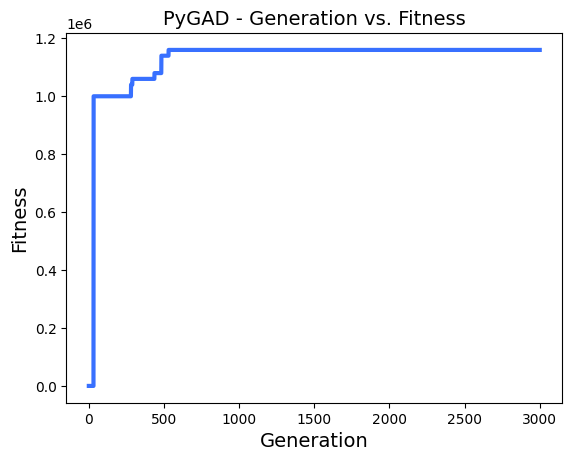

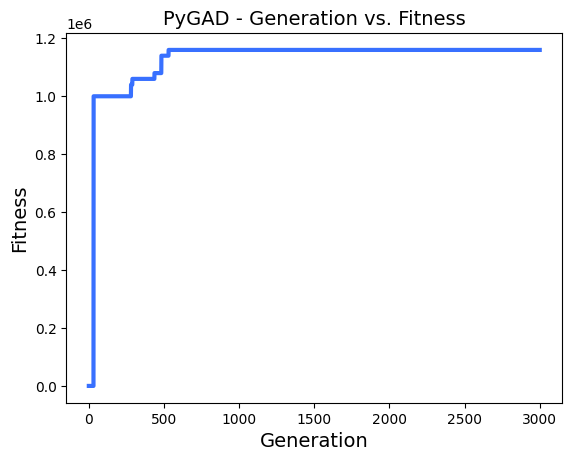

In [56]:
ga_instance.plot_fitness()

### Średni czas

In [57]:
czasy_wykonania_pd = pd.read_csv("czas.csv")
czasy_wykonania = czasy_wykonania_pd.values
sum = 0
for i in czasy_wykonania:
    sum += i[0]
avg = sum / len(czasy_wykonania)
print("Średni czas wykonywania algorytmu to:",avg,"sec")

Średni czas wykonywania algorytmu to: 198.47235773159906 sec
